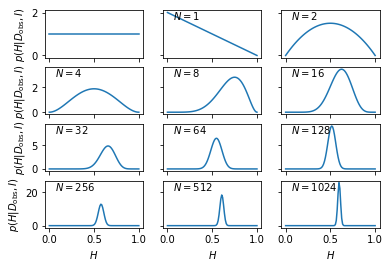

In [2]:
import numpy as np #import numpy for numerical operations
np.random.seed(999)         # for reproducibility
a=0.6                       # biased coin which we biased
flips=np.random.rand(2**12) # simulates 4096 coin flips 2^12
heads=flips<a               # boolean array, heads[i]=True if flip i is heads

def prior(H): #
    p=np.zeros_like(H)
    p[(0<=x)&(x<=1)]=1      # allowed range: 0<=H<=1
    return p                # uniform prior
def likelihood(H,data):
    N = len(data)
    no_of_heads = sum(data)
    no_of_tails = N - no_of_heads
    return H**no_of_heads * (1-H)**no_of_tails
def posterior(H,data):
    p=prior(H)*likelihood(H,data)
    norm=np.trapz(p,H)
    return p/norm

import matplotlib.pyplot as plt
x=np.linspace(0,1,100)
fig, axs = plt.subplots(nrows=4,ncols=3,sharex=True,sharey='row')
axs_vec=np.reshape(axs,-1)
axs_vec[0].plot(x,prior(x))
for ndouble in range(11):
    ax=axs_vec[1+ndouble]
    ax.plot(x,posterior(x,heads[:2**ndouble]))
    ax.text(0.1, 0.8, '$N={0}$'.format(2**ndouble), transform=ax.transAxes)
for row in range(4): axs[row,0].set_ylabel('$p(H|D_\mathrm{obs},I)$')
for col in range(3): axs[-1,col].set_xlabel('$H$')